# Doctor Consultancy_Fee Dataset

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [213]:
ds=pd.read_excel('dr_train.xlsx')

In [214]:
df_train=pd.DataFrame(ds)

In [215]:
ds1=pd.read_excel('dr_test.xlsx')

In [216]:
df_test=pd.DataFrame(ds1)

In [217]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [218]:
df_train.shape,df_test.shape

((5961, 7), (1987, 6))

In [219]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [220]:
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [221]:
df_test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [222]:
df_train.Qualification.value_counts()   

BDS                                                                                                                                         488
BHMS                                                                                                                                        477
BAMS                                                                                                                                        471
MBBS                                                                                                                                        334
MBBS, MS - ENT                                                                                                                              220
                                                                                                                                           ... 
BHMS, MD - Homeopathy, Nutrition Certification                                                                                          

# Data pre-processing

In [223]:
df_train.Qualification=df_train.Qualification.str.lower()
df_test.Qualification=df_test.Qualification.str.lower()


In [224]:
df_train.Qualification=df_train.Qualification.str.replace(',',' ')
df_test.Qualification=df_test.Qualification.str.replace(',',' ')

In [225]:
df_train.Qualification=df_train.Qualification.str.replace('-',' ')
df_test.Qualification=df_test.Qualification.str.replace('-',' ')

In [226]:
df_train.Qualification=df_train.Qualification.str.split(' ')
df_test.Qualification=df_test.Qualification.str.split(' ')

In [227]:
df_train.Qualification=df_train.Qualification.str[0]
df_test.Qualification=df_test.Qualification.str[0]

In [228]:
df_train.Qualification.unique()

array(['bhms', 'bams', 'mbbs', 'bsc', 'bds', 'mds', 'diploma', 'dm', 'md',
       'get', 'phd', 'mrcps', 'ms', 'ddvl', 'dhms', 'gceh', 'post', 'dnb',
       'certification', 'fellowship', 'fage', 'bsam', 'fnb',
       'certificate', 'certified', '39', 'lceh', 'doctor', 'diplomate',
       'msc', 'advanced', 'fcps', 'g.a.m.s', 'bums', 'mba', 'training',
       'pg', 'b.sc', 'm.ch', 'ddv', 'bems', 'mrcs', 'ma', 'mph',
       'graduate', 'mrcpch', 'frcs', 'b.ac', 'm.d.', 'bims', 'dvd',
       'ayurvedic', 'd.h.m', 'member', 'mrcgp', 'mrcp', 'cgo', 'pgd',
       'm.sc', 'dnhe', 'doctorate', 'frguhs', 'm.', 'frcp', 'cochlear',
       'masters', 'pdcc', 'ffdrcsi', 'dgo'], dtype=object)

In [229]:
df_test.Qualification.value_counts()

mbbs             865
bds              371
bhms             232
bams             228
md                92
mds               61
ms                36
diploma           15
dnb               13
ddvl              13
dhms              11
get                6
b.sc               6
lceh               5
bsc                5
bsam               2
post               2
dm                 2
fams               1
frcs               1
dehm               1
dms                1
dvd                1
certificate        1
bpth/bpt           1
ficd               1
do                 1
m.s.               1
fpfa               1
m.d.               1
dpm                1
mrcs               1
mrcp               1
mrcgp              1
fwfo               1
frcp               1
doctor             1
phd                1
fellowship         1
certification      1
Name: Qualification, dtype: int64

In [230]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,bhms,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,bams,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,mbbs,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,bsc,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,bams,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [231]:
df_train.Experience=df_train.Experience.str.replace('years experience','').astype('int64')
df_test.Experience=df_test.Experience.str.replace('years experience','').astype('int64')

In [232]:
df_train.Experience

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: int64

In [233]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int64 
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 326.1+ KB


In [234]:
df_train.Rating=df_train.Rating.str.replace('%','').astype('float64')
df_test.Rating=df_test.Rating.str.replace('%','').astype('float64')

In [235]:
df_test.Rating

0         NaN
1         NaN
2        70.0
3         NaN
4       100.0
        ...  
1982      NaN
1983      NaN
1984      NaN
1985     98.0
1986      NaN
Name: Rating, Length: 1987, dtype: float64

In [236]:
df_train.Place.unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [237]:
df_train.Place=df_train.Place.str.replace(',','')
df_test.Place=df_test.Place.str.replace(',','')

In [238]:
df_train["Place"] = df_train["Place"].str.split(" ")
df_test["Place"] = df_test["Place"].str.split(" ")

In [239]:
df_train["Place"] = df_train["Place"].str[-1]
df_test["Place"] = df_test["Place"].str[-1]


In [240]:
df_train.Place.unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', nan, 'e'],
      dtype=object)

In [241]:
df_train.Profile.unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [242]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,mbbs,35,NaN,Mumbai,General Medicine,NaN
1,mbbs,31,NaN,Hyderabad,ENT Specialist,NaN
2,mbbs,40,70.0,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,bams,0,NaN,Delhi,Ayurveda,NaN
4,bds,16,100.0,Bangalore,Dentist,General Dentistry Conservative Dentistry Cosme...


In [243]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   int64  
 2   Rating              2659 non-null   float64
 3   Place               5936 non-null   object 
 4   Profile             5961 non-null   object 
 5   Miscellaneous_Info  3341 non-null   object 
 6   Fees                5961 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 326.1+ KB


In [244]:
df_train.Fees.value_counts()

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64

# Checking Nullvalues

In [245]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [246]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [247]:
df_train.drop('Miscellaneous_Info',axis=1,inplace=True)
df_test.drop('Miscellaneous_Info',axis=1,inplace=True)


In [248]:
df_train.Place=df_train.Place.fillna(df_train.Place.mode()[0])
df_test.Place=df_test.Place.fillna(df_test.Place.mode()[0])

In [249]:
df_train.Rating=df_train.Rating.fillna(df_train.Rating.mean())
df_test.Rating=df_test.Rating.fillna(df_test.Rating.mean())

In [250]:
df_train.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

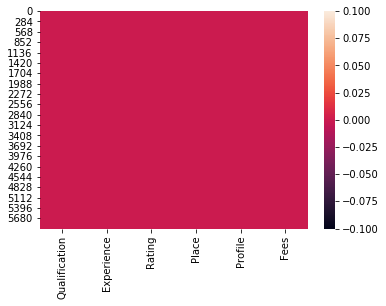

In [251]:
sns.heatmap(df_train.isnull())

In [252]:
df_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

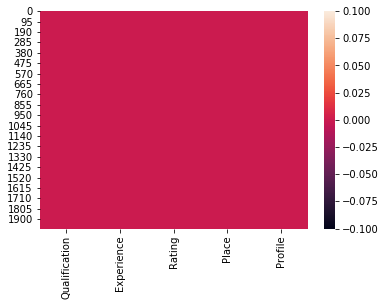

In [253]:
sns.heatmap(df_test.isnull())

now there is no null values in this dataset

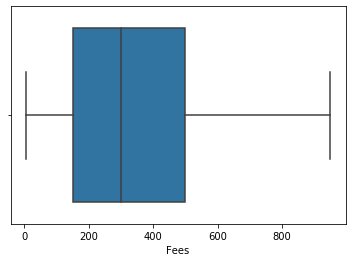

In [254]:
sns.boxplot(df_train.Fees)

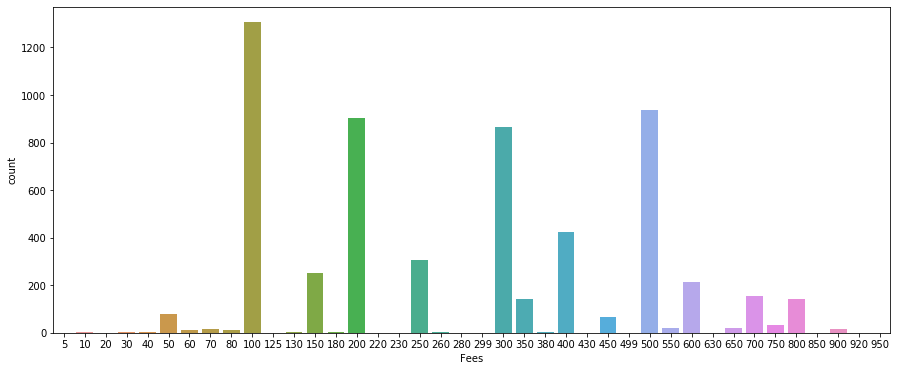

In [255]:
plt.figure(figsize=(15,6))
sns.countplot(df_train.Fees)

the most fee taken by dr is 100 rupees

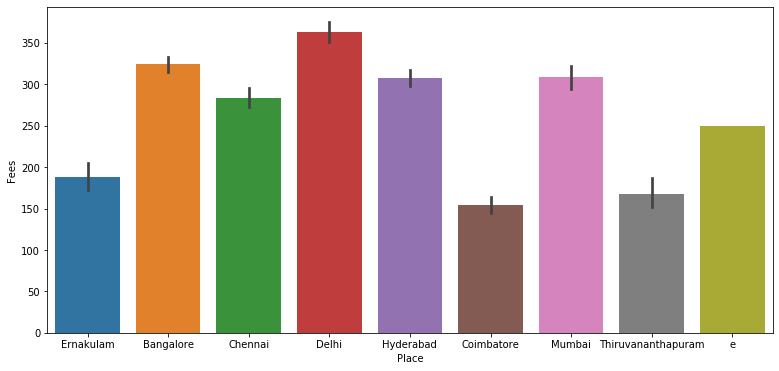

In [256]:
plt.figure(figsize=(13,6))

sns.barplot(df_train.Place,df_train.Fees)

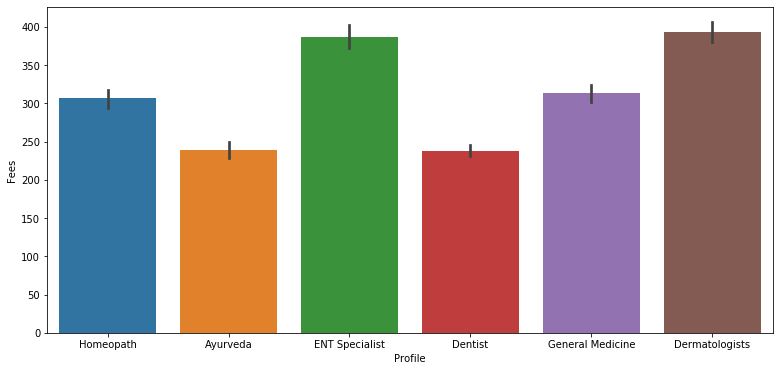

In [257]:
plt.figure(figsize=(13,6))

sns.barplot(df_train.Profile,df_train.Fees)

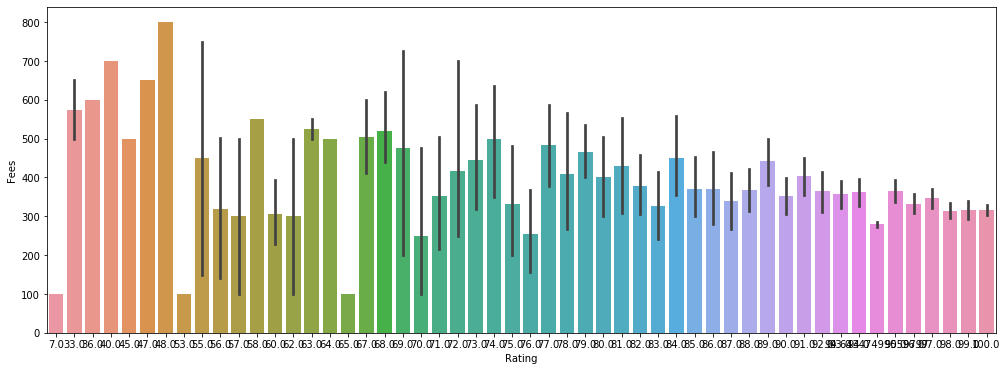

In [258]:
plt.figure(figsize=(17,6))

sns.barplot(df_train.Rating,df_train.Fees)

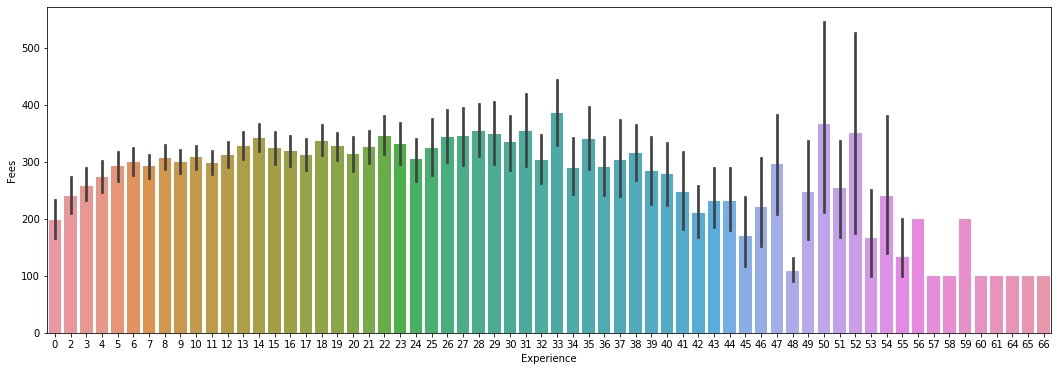

In [259]:
plt.figure(figsize=(18,6))

sns.barplot(df_train.Experience,df_train.Fees)

# labeling

In [260]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [261]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5961 non-null   object 
 1   Experience     5961 non-null   int64  
 2   Rating         5961 non-null   float64
 3   Place          5961 non-null   object 
 4   Profile        5961 non-null   object 
 5   Fees           5961 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 279.5+ KB


In [262]:
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Fees'], dtype='object')

In [263]:
df_train[['Qualification','Place','Profile']]=df_train[['Qualification','Place','Profile']].apply(le.fit_transform)
df_test[['Qualification','Place','Profile']]=df_test[['Qualification','Place','Profile']].apply(le.fit_transform)

In [264]:
df_train.head(),df_test.head()

(   Qualification  Experience      Rating  Place  Profile  Fees
 0              8          24  100.000000      4        5   100
 1              5          12   98.000000      0        0   350
 2             51           9   94.643475      0        3   300
 3             11          12   94.643475      0        0   250
 4              5          20  100.000000      1        0   250,
    Qualification  Experience      Rating  Place  Profile
 0             31          35   94.441472      6        4
 1             31          31   94.441472      5        3
 2             31          40   70.000000      1        2
 3              1           0   94.441472      3        0
 4              2          16  100.000000      0        1)

# Correlation

In [265]:
df_train.corr()

,Qualification,Experience,Rating,Place,Profile,Fees
Qualification,1.000000,0.234478,-0.203358,-0.036908,0.351467,0.251931
Experience,0.234478,1.000000,-0.177438,0.039231,0.202073,0.002117
Rating,-0.203358,-0.177438,1.000000,0.024810,-0.111018,-0.090106
Place,-0.036908,0.039231,0.024810,1.000000,-0.011226,-0.020368
Profile,0.351467,0.202073,-0.111018,-0.011226,1.000000,0.145226
Fees,0.251931,0.002117,-0.090106,-0.020368,0.145226,1.000000


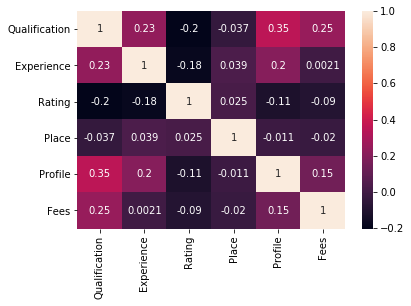

In [266]:
sns.heatmap(df_train.corr(),annot=True)

Here we can see the relation of independent variable with dependent variable......fees is highly related with qualification

In [267]:
df_train.shape

(5961, 6)

In [268]:
df_test.shape

(1987, 5)

# setting x and y variable

In [269]:
x_train=df_train.drop('Fees',axis=1)
x_train.shape

(5961, 5)

In [270]:
y_train=df_train['Fees']
y_train.shape

(5961,)

In [271]:
x_test=df_test
x_test.shape

(1987, 5)

# Standardscaler

In [273]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x_train)

In [274]:
x_train.shape

(5961, 5)

# Regression Process

In [275]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# LinearRegression

In [276]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.07383881558856431

In [292]:
pred_y=lr.predict(x_test)
print((pred_y))

[297.51924343 294.8777234  319.47473045 ... 334.0467627  241.41246627
 318.56257311]


In [278]:
score=cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.07194352 0.06037833 0.07547749 0.06797534 0.07920964]
0.07099686154028284
0.006485441965760121


# Lasso

In [279]:
from sklearn.linear_model import Lasso
lsr=Lasso()
pr={'alpha':[.0001,.001,.01,.1,1]}
gs=GridSearchCV(lsr,pr,cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'alpha': 1}

In [280]:
lsr=Lasso(alpha=1)
lsr.fit(x_train,y_train)
lsr.score(x_train,y_train)

0.07382117854677916

In [293]:
pred_y=lsr.predict(x_test)
print((pred_y))

[297.72254106 295.24277368 318.84017268 ... 332.87241826 241.21332496
 318.20280286]


In [282]:
score=cross_val_score(lsr,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.07248862 0.06025283 0.07533915 0.06838697 0.0793437 ]
0.07116225347998122
0.006524715058609492


# kneighborsregressor

In [283]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
pr={'n_neighbors':range(1,30)}
gs=GridSearchCV(knn,pr,cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'n_neighbors': 24}

In [284]:
knn=KNeighborsRegressor(n_neighbors=24)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.1933649526140313

In [294]:
pred_y=knn.predict(x_test)
print((pred_y))

[258.33333333 318.75       385.83333333 ... 327.08333333 208.33333333
 339.58333333]


In [286]:
score=cross_val_score(knn,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.11727728 0.1258717  0.12340352 0.10413774 0.09879704]
0.11389745696243883
0.010662510031429


# GradientBoostingRegressor

In [287]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
pr={'learning_rate':[.0001,.001,.01,.1,1],'n_estimators':[10,50,100,150,200,250,300]}
gs=GridSearchCV(gb,pr,cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [288]:
gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=150)
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.24282708601343891

In [295]:
pred_y=gb.predict(x_test)
print((pred_y))

[236.06200286 344.76980928 301.83045464 ... 274.49399189 299.50467698
 318.59718286]


In [290]:
score=cross_val_score(gb,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.18526699 0.16818629 0.19799055 0.1794305  0.18059412]
0.18229368906788726
0.009647146569601745


# RandomForestClassifier

In [291]:
from sklearn.ensemble import RandomForestRegressor
re=RandomForestRegressor()
pr={'n_estimators':[10,50,100,150,200,250,300]}
gs=GridSearchCV(re,pr,cv=5)
gs.fit(x_train,y_train)
gs.best_params_


{'n_estimators': 300}

In [296]:
re=RandomForestRegressor(n_estimators=300)
re.fit(x_train,y_train)
re.score(x_train,y_train)

0.6608360537033519

In [297]:
pred_y=re.predict(x_test)
print((pred_y))

[252.57914863 320.83333333 462.         ... 227.06127946 218.36507937
 297.98796296]


In [298]:
score=cross_val_score(re,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[-0.0092606   0.00172385  0.00653781  0.02700096 -0.03838055]
-0.0024757050706537775
0.02146134295375234


# DecisionTreeRegressor

In [299]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.7260043117660325

In [300]:
pred_y=dt.predict(x_test)
print((pred_y))

[350. 200. 800. ... 150. 150. 100.]


In [301]:
score=cross_val_score(dt,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[-0.52707976 -0.43105517 -0.41983501 -0.40296491 -0.44637812]
-0.4454625943813664
0.04320324060698717


# Saving the Prediction

in this dataset the randomforestregressor is performing good.....so we select the randomforestregressor for this dataset

In [302]:
pred=re.predict(x_test)
print((pred))

[252.57914863 320.83333333 462.         ... 227.06127946 218.36507937
 297.98796296]


In [303]:
y_pred=(pred)

In [304]:
y_pred=pd.DataFrame(y_pred)

In [308]:
y_pred.to_csv('prediction_y_dr_fee.csv')

In [306]:
y_pred

,0
0,252.579149
1,320.833333
2,462.000000
3,134.961310
4,304.995238
...,...
1982,201.664947
1983,331.188889
1984,227.061279
1985,218.365079


In [307]:
y_train

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64